# Far field calculations for phase calibration

For a source at distance $r$ from the phase-center of the telescope, and for an antenna
at a distance $b$ from the phase center, what is the maximum phase error that results if we
don't take the finite distance into consideration.

A bit of geometry. The 

In [1]:
import sympy as sp

r = sp.Symbol('r', real=True, positive=True)
b = sp.Symbol('b', real=True, positive=True)

distance_error = sp.simplify(r*(1 - sp.cos(sp.asin(b/r))))

In [2]:
distance_error

r - sqrt(-b**2 + r**2)

## Simulation

Plot the resulting distance error (measured in degrees) as a function of source radius for a telescope with a maximum radius of 2 meters.

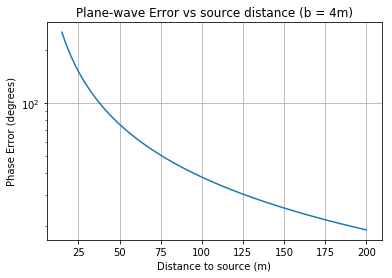

In [3]:
import matplotlib.pyplot as plt
import numpy as np

baseline = 2.0
wavelen = 0.19
r = np.linspace(15,500,200)
distance_error = r - np.sqrt(-baseline**2 + r**2)
phase_error = (distance_error / wavelen)*2*np.pi
plt.semilogy(r,np.degrees(phase_error))
plt.grid(True)
plt.xlabel('Distance to source (m)')
plt.ylabel('Phase Error (degrees)')
plt.title('Plane-wave Error vs source distance (b = 4m)')
plt.show()

The conclusion is that for all calibration sources, which are likely to be quite close (within 100m of the telescope), we need to take the source distance into consideration to keep the phase error below ten degrees. Even after 200m, the phase error is still too large.